In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [1]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.0.0
aiohttp                            3.8.4
aiosignal                          1.3.1
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
arviz                              0.11.4
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
async-timeout                      4.0.2
atomicwrites                       1.4.0
attrs                              21.2.0
Automat                           

In [2]:
!pip install --upgrade pandas

     --------------------------------------- 10.7/10.7 MB 18.7 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\A803377\\Anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
pip install --upgrade numpy --user

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\a803377\anaconda3\lib\site-packages (1.20.3)
     ---------------------------------------- 14.9/14.9 MB 1.3 MB/s eta 0:00:00



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.


In [17]:
df=pd.read_csv(r'C:\Users\A803377\Downloads\test_preds_test.csv')
df

,Material,Sales Order Num,Reporting Date,Time Step,Close By End Of Month,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517)
0,777996,60787169,2022-06-30 07:44:34.617,227468,1,0.747219,0.252781,0
1,777996,60787169,2022-06-30 07:44:34.617,227467,1,0.747219,0.252781,0
2,777996,60787169,2022-06-30 07:44:34.617,227466,1,0.747219,0.252781,0
3,777996,60787169,2022-06-30 07:44:34.617,227465,1,0.747219,0.252781,0
4,777996,60787169,2022-06-29 07:36:50.800,227464,1,0.747219,0.252781,0
...,...,...,...,...,...,...,...,...
2271811,882357,8720013,2022-06-30 07:44:34.617,227466,1,0.988021,0.011979,0
2271812,882141,8720015,2022-06-30 07:44:34.617,227468,0,0.969589,0.030411,0
2271813,324964,8720016,2022-06-30 07:44:34.617,227468,0,0.522394,0.477606,0
2271814,423575,8720020,2022-06-30 07:44:34.617,227468,0,0.974754,0.025246,0


In [8]:
#df_amt['Reporting Date']= pd.to_datetime(df_amt['Reporting Date']).dt.date

In [9]:
df.drop(['Reporting Date','Time Step'],axis=1,inplace=True)

In [51]:
df.drop_duplicates(keep=False,inplace=True)

In [10]:
df

,Material,Sales Order Num,Close By End Of Month,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517)
0,777996,60787169,1,0.747219,0.252781,0
1,777996,60787169,1,0.747219,0.252781,0
2,777996,60787169,1,0.747219,0.252781,0
3,777996,60787169,1,0.747219,0.252781,0
4,777996,60787169,1,0.747219,0.252781,0
...,...,...,...,...,...,...
2271811,882357,8720013,1,0.988021,0.011979,0
2271812,882141,8720015,0,0.969589,0.030411,0
2271813,324964,8720016,0,0.522394,0.477606,0
2271814,423575,8720020,0,0.974754,0.025246,0


In [19]:
df1 = df.drop_duplicates(subset=['Material', 'Sales Order Num'], keep='last')

In [20]:
df1.drop(['Close By End Of Month.0','Close By End Of Month.1'],axis=1,inplace=True)

In [21]:
df1

,Material,Sales Order Num,Reporting Date,Time Step,Close By End Of Month,Close By End Of Month.predicted(th=0.53517)
87,777996,60787169,2022-06-01 07:34:58.660,227381,1,0
91,911473,60789759,2022-06-28 07:38:55.787,227465,1,0
1543,932744,60791606,2022-06-01 07:34:58.660,226017,1,1
1565,877735,60791878,2022-06-01 07:34:58.660,227447,0,0
1577,934449,60793120,2022-06-06 07:34:26.353,227457,1,0
...,...,...,...,...,...,...
2271811,882357,8720013,2022-06-30 07:44:34.617,227466,1,0
2271812,882141,8720015,2022-06-30 07:44:34.617,227468,0,0
2271813,324964,8720016,2022-06-30 07:44:34.617,227468,0,0
2271814,423575,8720020,2022-06-30 07:44:34.617,227468,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [23]:
print("accuracy score:",accuracy_score(df1['Close By End Of Month'],df1['Close By End Of Month.predicted(th=0.53517)']))
print("confusion_matrix:\n",confusion_matrix(df1['Close By End Of Month'],df1['Close By End Of Month.predicted(th=0.53517)']))
# print("classification_report:\n",classification_report(df1['Close By End Of Month'],df1['Close By End Of Month.predicted(th=0.53517)']))

accuracy score: 0.8380917388290898
confusion_matrix:
 [[72069  6864]
 [12525 28295]]


In [24]:
print("accuracy score:",accuracy_score(df['Close By End Of Month'],df['Close By End Of Month.predicted(th=0.53517)']))
print("confusion_matrix:\n",confusion_matrix(df['Close By End Of Month'],df['Close By End Of Month.predicted(th=0.53517)']))
# print("classification_report:\n",classification_report(df['Close By End Of Month'],df['Close By End Of Month.predicted(th=0.53517)']))

accuracy score: 0.8730623430770802
confusion_matrix:
 [[1173851  109635]
 [ 178744  809586]]


In [113]:
df_amt[df_amt['Sales Order Num']== 8679423]

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month
1652224,33516,8679423,2022-06-01 07:34:58.660,1203.969736,0.018358,0.981642,1,1
1652225,33516,8679423,2022-06-01 07:34:58.660,1203.969736,0.024923,0.975077,1,1
1652222,33516,8679423,2022-06-02 07:34:27.730,1203.969736,0.007488,0.992512,1,1
1652223,33516,8679423,2022-06-02 07:34:27.730,1203.969736,0.009252,0.990748,1,1
1652220,33516,8679423,2022-06-03 07:34:30.310,1203.969736,0.002326,0.997674,1,1
1652221,33516,8679423,2022-06-03 07:34:30.310,1203.969736,0.003549,0.996451,1,1
1652218,33516,8679423,2022-06-06 07:34:26.353,1203.969736,0.001883,0.998117,1,1
1652219,33516,8679423,2022-06-06 07:34:26.353,1203.969736,0.002328,0.997672,1,1
1652216,33516,8679423,2022-06-07 07:39:26.280,1203.969736,0.001034,0.998966,1,1
1652217,33516,8679423,2022-06-07 07:39:26.280,1203.969736,0.001227,0.998773,1,1


In [25]:
import pandas as pd
df_amt=pd.read_csv(r'C:\Users\A803377\Downloads\test_preds_test_with_amount.tar.gz',compression='gzip')
df_amt.drop(df_amt.index[2271816], inplace = True)

df_amt = pd.concat([df_amt, df['Close By End Of Month']], axis = 1, join = 'outer')
df_amt[['Close By End Of Month.predicted(th=0.53517)','Sales Order Num','test_preds_test_with_amount.csv']]=df_amt[['Close By End Of Month.predicted(th=0.53517)','Sales Order Num','test_preds_test_with_amount.csv']].astype(int)
df_amt.rename(columns = {'test_preds_test_with_amount.csv':'Material'}, inplace = True)

# df_amt_june['Close By End Of Month'] = df_amt_june['Close By End Of Month'].astype(np.int32)
df_amt.sort_values(by=['Material','Sales Order Num','Reporting Date'],inplace=True)
df_amt

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month
342336,1231,8563914,2022-06-01 07:34:58.660,0.0,0.999788,0.000212,0,0
342335,1231,8563914,2022-06-02 07:34:27.730,0.0,0.999849,0.000152,0,0
342334,1231,8563914,2022-06-03 07:34:30.310,0.0,0.999892,0.000108,0,0
342333,1231,8563914,2022-06-06 07:34:26.353,0.0,0.999916,0.000084,0,0
342332,1231,8563914,2022-06-07 07:39:26.280,0.0,0.999932,0.000068,0,0
...,...,...,...,...,...,...,...,...
1565491,8868279,8675758,2022-06-10 07:37:56.237,26829.0,0.977400,0.022600,0,0
1565490,8868279,8675758,2022-06-15 07:36:31.563,26829.0,0.985701,0.014299,0,0
1565489,8868279,8675758,2022-06-17 11:33:02.950,26829.0,0.983696,0.016304,0,0
1565488,8868279,8675758,2022-06-22 07:45:42.460,26829.0,0.983005,0.016995,0,0


In [ ]:
# df_amt.drop(['Reporting Date',],axis=1,inplace=True)

In [64]:
# df_amt['Reporting Date']= pd.to_datetime(df_amt['Reporting Date']).dt.date
df_amt_june[df_amt_june['Sales Order Num']== 8629664]

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month
985419,877607,8629664,2022-06-01 07:34:58.660,52020.000000,0.546073,0.453927,0,1
985356,877607,8629664,2022-06-30 07:44:34.617,569.289488,0.089324,0.910676,1,1


In [26]:
df_amt_june = df_amt.drop_duplicates(subset=['Material','Sales Order Num','$CC Open Net Amount'], keep='last')

In [27]:
df_amt_june

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month
342315,1231,8563914,2022-06-30 07:44:34.617,0.000000,0.999945,0.000055,0,0
358440,1231,8569727,2022-06-30 07:44:34.617,0.000000,0.999970,0.000030,0,0
363811,1231,8571390,2022-06-30 07:44:34.617,0.000000,0.999975,0.000025,0,0
365298,1231,8571980,2022-06-30 07:44:34.617,0.000000,0.999967,0.000033,0,0
365436,1231,8572019,2022-06-30 07:44:34.617,45.709452,0.999891,0.000109,0,0
...,...,...,...,...,...,...,...,...
2090236,8868203,8699941,2022-06-24 07:36:47.543,125155.470000,0.968596,0.031404,0,0
2126035,8868203,8702406,2022-06-24 07:36:47.543,79644.390000,0.968197,0.031803,0,0
1565465,8868275,8675758,2022-06-30 07:44:34.617,5574.240000,0.995494,0.004506,0,0
2141997,8868277,8703420,2022-06-27 07:45:10.770,10640.156156,0.020597,0.979403,1,1


In [28]:
df_amt_june['$CC Open Net Amount'].sum()

903998184.6014708

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix


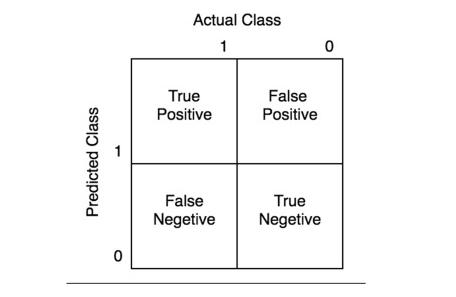

In [111]:
print("accuracy score:",accuracy_score(df_amt_june['Close By End Of Month'],df_amt_june['Close By End Of Month.predicted(th=0.53517)']))
print("confusion_matrix:\n",confusion_matrix(df_amt_june['Close By End Of Month'],df_amt_june['Close By End Of Month.predicted(th=0.53517)']))



accuracy score: 0.8999898204483701
confusion_matrix:
 [[73316  7713]
 [ 5059 41619]]


In [86]:
df_amt_june['New Pred'] = np.where(df_amt_june['Close By End Of Month.1']<=.40, 0, 1)

In [87]:
print("accuracy score:",accuracy_score(df_amt_june['Close By End Of Month'],df_amt_june['New Pred'] ))
print("confusion_matrix:\n",confusion_matrix(df_amt_june['Close By End Of Month'],df_amt_june['New Pred'] ))

accuracy score: 0.8996217905048275
confusion_matrix:
 [[71671  9358]
 [ 3461 43217]]


In [45]:
from datetime import datetime
import os


file_name = 'H2O_amt1.xlsx'

df_amt_june.to_excel(file_name,index=False)

In [43]:
# mat_grp = df_amt.groupby(['Material', 'Sales Order Num'],as_index=False).max(['$CC Open Net Amount'])
# mat_grp

In [43]:
# from datetime import datetime
# import os


# file_name = 'H2O_amt_MatG.xlsx'

# mat_grp.to_excel(file_name)

In [44]:
# mat_grp['$CC Open Net Amount'].sum()

In [30]:
# mat_grp['Material'].nunique()

In [88]:
df_closed_predicted= df_amt_june [df_amt_june['New Pred'] == 1]
df_closed_predicted

In [89]:
df_closed_predicted= df_amt_june [df_amt_june['Close By End Of Month.predicted(th=0.53517)'] == 1]
df_closed_predicted

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month,New Pred
1787118,20138,8685659,2022-06-14 07:50:30.603,0.000000,0.040652,0.959348,1,1,1
2139839,20138,8703241,2022-06-30 07:44:34.617,0.000000,0.308765,0.691234,1,0,1
1652217,33516,8679423,2022-06-07 07:39:26.280,1203.969736,0.001227,0.998773,1,1,1
1797122,33516,8686203,2022-06-13 07:37:25.113,0.000000,0.004377,0.995623,1,1,1
1977629,33516,8694059,2022-06-20 07:40:08.307,0.000000,0.003811,0.996189,1,1,1
...,...,...,...,...,...,...,...,...,...
2124821,6529455,8702280,2022-06-16 07:35:56.850,151.300000,0.000313,0.999687,1,1,1
2154831,6529455,8704636,2022-06-17 11:33:02.950,151.300000,0.051124,0.948876,1,1,1
2242996,6529455,8712791,2022-06-27 07:45:10.770,30.260000,0.083082,0.916918,1,1,1
2261286,6529455,8715904,2022-06-28 07:38:55.787,30.260000,0.162174,0.837826,1,1,1


In [90]:
pred_val= (df_closed_predicted['$CC Open Net Amount'].sum())/1000
print('Predicted Values:',pred_val)

Predicted Values: 211032.72085932034


In [32]:
df_closed_actual= df_amt_june [df_amt_june['Close By End Of Month'] == 1]
df_closed_actual

,Material,Sales Order Num,Reporting Date,$CC Open Net Amount,Close By End Of Month.0,Close By End Of Month.1,Close By End Of Month.predicted(th=0.53517),Close By End Of Month
1787118,20138,8685659,2022-06-14 07:50:30.603,0.000000,0.040652,0.959348,1,1
1652217,33516,8679423,2022-06-07 07:39:26.280,1203.969736,0.001227,0.998773,1,1
1797122,33516,8686203,2022-06-13 07:37:25.113,0.000000,0.004377,0.995623,1,1
1977629,33516,8694059,2022-06-20 07:40:08.307,0.000000,0.003811,0.996189,1,1
1986510,33622,8694699,2022-06-15 07:36:31.563,496.134240,0.001145,0.998855,1,1
...,...,...,...,...,...,...,...,...
2154831,6529455,8704636,2022-06-17 11:33:02.950,151.300000,0.051124,0.948876,1,1
2242996,6529455,8712791,2022-06-27 07:45:10.770,30.260000,0.083082,0.916918,1,1
2261286,6529455,8715904,2022-06-28 07:38:55.787,30.260000,0.162174,0.837826,1,1
1277751,8000022,8648630,2022-06-30 07:44:34.617,2771.385240,0.503579,0.496421,0,1


In [33]:
Actl_val = (df_closed_actual['$CC Open Net Amount'].sum())/1000
print('Actual_value:',Actl_val)


Actual_value: 248658.59975674667


In [112]:
a=round(Actl_val-pred_val,2)
b= round(((Actl_val-pred_val)/Actl_val)*100,2)

print('Actl_val-pred_val:',a)
print('Actl_val-pred_val % Diff:',b,'%')

Actl_val-pred_val: 37625.88
Actl_val-pred_val % Diff: 15.13 %


In [47]:
df_amt_june['$CC Open Net Amount'].sum()

903998184.6014708

In [1]:
903998184.60137 - 1534734372.8851

-630736188.2837299

In [2]:
23219509280.7297 - 34224975104.3474

-11005465823.617702

In [3]:
1627236 - 3366159

-1738923

In [ ]:
#df_amt_june['New Pred'] = np.where(df_amt_june['Close By End Of Month.1']<=.20, 0, 1)